<a href="https://colab.research.google.com/github/akanison12/Sudo-code-2024/blob/main/240114_Machine_translation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/qhungngo/EVBCorpus
%cd EVBCorpus
!unrar x EVBCorpus_EVBNews_v1.0.rar




Cloning into 'EVBCorpus'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (35/35), 35.37 MiB | 4.01 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (9/9), done.
/content/EVBCorpus

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from EVBCorpus_EVBNews_v1.0.rar

Creating    EVBCorpus_v1                                              OK
Creating    EVBCorpus_v1/EVBNews                                      OK
Extracting  EVBCorpus_v1/EVBNews/N0001.sgml                                0%  OK 
Extracting  EVBCorpus_v1/EVBNews/N0002.sgml                                0%  OK 
Extracting  EVBCorpus_v1/EVBNews/N0003.sgml                                0%  OK 
Extracting  EVBCorpus_v1/EVBNews/N0004.sgml                                0%  OK 
Extracting  EVBCorpus_v1/EVBNews/N0005.sgml                              

In [ ]:
!pip install torch==2.0.1+cpu torchvision==0.15.2+cpu torchaudio==2.0.2+cpu torchtext==0.15.2 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0+cu121
    Uninstalling torch-2.5.0+cu121:
      Successfully uninstalled torch-2.5.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.0+cu121
    Uninstalling torchvision-0.20.0+cu121:
      Successfully uninstalled torchvision-0.20.0+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.0+cu121
    Uninstalling torchaudio-2.5.0+cu121:
      Successfully uninstalled torchaudio-2.5

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from typing import Iterable, List
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from timeit import default_timer as timer
from torch.nn import Transformer
from torch import Tensor
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
import math
import os
import pandas as pd



In [ ]:
import os
import csv
from bs4 import BeautifulSoup

file_path = '/content/EVBCorpus/EVBCorpus_v1/EVBNews'
output_file = '/content/data.csv'
count = 0

# Mở file CSV để ghi dữ liệu
with open(output_file, mode='w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['English Sentence', 'Vietnamese Sentence'])

    # Lấy danh sách các tệp trong thư mục
    file_list = os.listdir(file_path)

    for file_name in file_list:
        file_path_full = os.path.join(file_path, file_name)

        if file_name.endswith('.sgml'):
            try:
                # Đọc nội dung tệp
                with open(file_path_full, 'r', encoding='utf-8', errors='replace') as sgml_file:
                    content = sgml_file.read()

                # Sử dụng BeautifulSoup để phân tích cú pháp
                soup = BeautifulSoup(content, 'html.parser')

                # Duyệt qua từng thẻ <spair>
                for spair in soup.find_all('spair'):
                    en_sentence = spair.find("s", {"id": lambda x: x and x.startswith('en')})
                    vn_sentence = spair.find("s", {"id": lambda x: x and x.startswith('vn')})

                    # Kiểm tra nếu cả hai câu đều tồn tại
                    if en_sentence and vn_sentence:
                        en_text = en_sentence.text.strip()
                        vn_text = vn_sentence.text.strip()
                        count += 1
                        writer.writerow([en_text, vn_text])

            except Exception as e:
                print(f"Lỗi xử lý file {file_path_full}: {e}")

print("Đã hoàn thành trích xuất câu!")
























































In [ ]:

data=pd.read_csv('/content/drive/MyDrive/ Sudo-ccode/W7/data (1).csv')
data

,English Sentence,Vietnamese Sentence
0,Europe agrees new agencies to supervise financ...,Châu Âu đồng ý thành lập các cơ quan mới để gi...
1,The European Union has reached agreement on re...,Các quan chức vừa cho biết Liên minh Châu Âu đ...
2,EU states and the European Commission agreed t...,Các nước EU và Uỷ ban Châu Âu đồng ý thành lập...
3,The deal must still be approved by European fi...,Việc thoả thuận này vẫn phải được thông qua Bộ...
4,Europe 's move follows the sweeping Wall Stree...,Động thái của châu Âu đi liền theo sau việc cả...
...,...,...
45303,Greece banned short-selling on Monday .,Hy Lạp cấm bán khống vào hôm thứ Hai .
45304,"Investors are concerned about European banks ,...",Các nhà đầu tư lo ngại cho các ngân hàng Châu ...
45305,The fear is that the banks will have to write-...,Người ta lo ngại các ngân hàng sẽ phải giảm gi...
45306,"French banks are the most exposed , hence they...","Ngân hàng Pháp tiếp xúc nhiều nhất , vì thế họ..."


In [ ]:
np.random.seed(42)
data_sub=data.sample(n=10000)
data_sub

,English Sentence,Vietnamese Sentence
26934,What treatments are available for nail-biting ?,Những cách nào giúp bỏ tật cắn móng tay ?
8321,Here are some tips for having fun and staying ...,Dưới đây là một số bí quyết giúp bạn có được n...
38521,When to delay or avoid immunization,Khi nào nên hoãn hoặc tránh chủng ngừa
22848,The patient is asked to return to reassessment...,Bệnh nhân được yêu cầu trở lại tái khám sau kh...
37762,""" If the only reason you asked that is so you ...",""" Nếu lý do duy nhất con hỏi chuyện đó là để c..."
...,...,...
8082,The government and the authorities here are wo...,Chính phủ và chính quyền nơi đây đang lo lắng .
42607,There 's one important exception to this rule ...,Một ngoại lệ hết sức quan trọng đối với nguyên...
20979,Producer Price Indexes ( PPI ) - A family of i...,Chỉ số giá sản xuất ( PPI ) - Một nhóm các chỉ...
44061,Symptoms usually appear 2 to 7 days after a pe...,Triệu chứng thường xuất hiện từ 2 đến 7 ngày s...


#Build vocabulary

In [ ]:
train_data, test_data = train_test_split(data_sub, test_size=0.2, random_state=42)
train_data,val_data=train_test_split(train_data,test_size=0.25,random_state=42)


In [ ]:
train_data

,English Sentence,Vietnamese Sentence
42527,MUTUAL DEMANDS,CẦN CÓ NHAU
21982,"The government , concerned by the rising numbe...",Chính phủ lo lắng do sự gia tăng số trẻ em bị ...
39237,"The "" Wacko Jacko "" name is coined soon after ...","Tên "" Wacko Jacko "" được đặt chẳng bao lâu sau..."
28675,""" The American people do not want the mosque t...",""" Người dân Mỹ không muốn đền thờ Hồi giáo ở đ..."
44366,Brazil held off an Egpyt fightback to open the...,Brazil đã chặn đứng mọi nỗ lực của Ai cập để m...
...,...,...
34885,"India was worst hit due to "" a slump in its eq...","Bản báo cáo cho biết , Ấn Độ chịu tác động nặn..."
20342,""" Do you see a white ribbon in the tree ? """,""" Ông có thấy dải ru-băng trắng trên cây không..."
24210,"If you choose the first option , you will only...","Nếu bạn lựa chọn cách đầu tiên , bạn sẽ chỉ cả..."
31411,Medical News Today,Medical News Today


In [ ]:
tokenizer = get_tokenizer('basic_english')


In [ ]:
# Define special symbols and indices.
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab.
special = ['<unk>', '<pad>', '<bos>', '<eos>']

In [ ]:
def tensor_transform(token_ids: List[int]) -> torch.Tensor:
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

In [ ]:
def build_vocab(data: Iterable, tokenizer) -> dict:
    return build_vocab_from_iterator(map(tokenizer, data), specials=["<unk>", "<pad>", "<bos>", "<eos>"])

vocab_en = build_vocab(train_data['English Sentence'], tokenizer)
vocab_vi = build_vocab(train_data['Vietnamese Sentence'], tokenizer)

vocab_en.set_default_index(vocab_en["<unk>"])
vocab_vi.set_default_index(vocab_vi["<unk>"])



#Build dataloader

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence
from typing import Tuple, List
import pandas as pd

class TransformerDataset(Dataset):
    def __init__(self, dataframe: pd.DataFrame, vocab_en, vocab_vi, tokenizer):
        """
        Khởi tạo dataset cho mô hình Transformer.

        Args:
            dataframe: DataFrame chứa các cặp câu (tiếng Anh, tiếng Việt).
            vocab_en: Từ điển cho tiếng Anh.
            vocab_vi: Từ điển cho tiếng Việt.
            tokenizer: Hàm token hóa.
        """
        self.dataframe = dataframe
        self.vocab_en = vocab_en
        self.vocab_vi = vocab_vi
        self.tokenizer = tokenizer

    def __len__(self) -> int:
        """Trả về số lượng mẫu trong dataset."""
        return len(self.dataframe)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Trả về cặp (input, target) cho mẫu tại chỉ số idx.

        Args:
            idx: Chỉ số mẫu.

        Returns:
            Tuple chứa tensor đầu vào và đầu ra.
        """
        src_sentence = self.dataframe.iloc[idx]['English Sentence']
        tgt_sentence = self.dataframe.iloc[idx]['Vietnamese Sentence']

        # Token hóa và chuyển đổi thành chỉ số
        src_tensor = tensor_transform(self.vocab_en(self.tokenizer(src_sentence)))
        tgt_tensor = tensor_transform(self.vocab_vi(self.tokenizer(tgt_sentence)))

        return src_tensor, tgt_tensor


    def collate_fn(batch: List[Tuple[torch.Tensor, torch.Tensor]]) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Hàm collate để chuẩn bị dữ liệu cho DataLoader.

        Args:
            batch: Danh sách các cặp tensor (input, target).

        Returns:
            Tuple chứa tensor đầu vào và đầu ra đã được padding.
        """
        src_batch, tgt_batch = [], []

        for src_tensor, tgt_tensor in batch:
            src_batch.append(src_tensor)
            tgt_batch.append(tgt_tensor)

        # Padding các tensor trong batch

        src_batch = pad_sequence(src_batch, padding_value=PAD_IDX,batch_first=True)
        tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX,batch_first=True)

        return src_batch, tgt_batch







In [ ]:
dataset_train = TransformerDataset(train_data, vocab_en, vocab_vi, tokenizer)
dataset_val = TransformerDataset(val_data, vocab_en, vocab_vi, tokenizer)
dataset_test = TransformerDataset(test_data, vocab_en, vocab_vi, tokenizer)

#data loader
train_dataloader= DataLoader(dataset_train, batch_size=32, shuffle=True, collate_fn=TransformerDataset.collate_fn)
val_dataloader = DataLoader(dataset_val, batch_size=32, shuffle=False, collate_fn=TransformerDataset.collate_fn)
test_dataloader = DataLoader(dataset_test, batch_size=32, shuffle=False, collate_fn=TransformerDataset.collate_fn)


In [ ]:
dataset_train[0]

(tensor([   2, 3147, 4927,    3]), tensor([  2, 158,   7, 237,   3]))

#Build models

In [ ]:
DEVICE=torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask

def create_mask(src, tgt):
    src_seq_len = src.shape[1]  # Kích thước chuỗi đầu vào
    tgt_seq_len = tgt.shape[1]  # Kích thước chuỗi đầu ra

    # Tạo mặt nạ cho đầu ra
    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)

    # Tạo mặt nạ cho đầu vào
    src_mask = torch.zeros((src_seq_len, src_seq_len), device=DEVICE).type(torch.bool)

    # Mặt nạ cho vị trí padding
    src_padding_mask = (src == PAD_IDX)
    tgt_padding_mask = (tgt == PAD_IDX)

    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask


In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
        """
        :param max_len: Input length sequence.
        :param d_model: Embedding dimension.
        :param dropout: Dropout value (default=0.1)
        """
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    def forward(self, x):
        """
        Inputs of forward function
        :param x: the sequence fed to the positional encoder model (required).
        Shape:
            x: [sequence length, batch size, embed dim]
            output: [sequence length, batch size, embed dim]
        """
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

In [ ]:
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size: int):
        """
        Initialize the TokenEmbedding class.

        :param vocab_size: The size of the vocabulary (number of words in the vocabulary).
        :param emb_size: The size of the embeddings (dimensionality of the embedding vectors).
        """
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor) -> Tensor:
        """
        Receive token IDs and return their corresponding embedding vectors.

        :param tokens: A Tensor containing the token IDs.
        :return: A Tensor containing the embedding vectors corresponding to the tokens.
        """
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

In [ ]:
class Seq2SeqTransformer(nn.Module):
    def __init__(
        self,
        num_encoder_layers: int,
        num_decoder_layers: int,
        emb_size: int,
        nhead: int,
        src_vocab_size: int,
        tgt_vocab_size: int,
        dim_feedforward: int = 512,
        dropout: float = 0.1
    ):
        super(Seq2SeqTransformer, self).__init__()
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(emb_size, dropout=dropout)
        self.transformer = nn.Transformer(
            d_model=emb_size,
            nhead=nhead,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True
        )



        self.generator = nn.Linear(emb_size, tgt_vocab_size)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))

        # Chỉ sử dụng `memory_key_padding_mask` cho transformer
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask,
                                memory_key_padding_mask=src_padding_mask)

        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(self.tgt_tok_emb(tgt)), memory, tgt_mask)



In [ ]:

num_encoder_layers=3
num_decoder_layers=3
emb_size=512
src_vocab_size=len(vocab_en)
tgt_vocab_size=len(vocab_vi)
nhead=8
dim_feedforward=512
dropout=0.1
epochs=5

In [ ]:
model=Seq2SeqTransformer(num_encoder_layers,num_decoder_layers,emb_size,nhead,src_vocab_size,tgt_vocab_size,dim_feedforward,dropout)
print(model)







Seq2SeqTransformer(
  (src_tok_emb): TokenEmbedding(
    (embedding): Embedding(13358, 512)
  )
  (tgt_tok_emb): TokenEmbedding(
    (embedding): Embedding(6219, 512)
  )
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (linear1): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer=torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)


In [ ]:
def train_epoch(model, optimizer, loss_fn):
    print('Training')
    model.train()
    total_loss = 0

    for src, tgt in tqdm(train_dataloader, total=len(train_dataloader)):
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:, :-1]

        # Tạo mask cho đầu vào và đầu ra
        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        # Dự đoán đầu ra
        logits = model(
            src,
            tgt_input,
            src_mask,
            tgt_mask,
            src_padding_mask,
            tgt_padding_mask
        )

        optimizer.zero_grad()
        tgt_out = tgt[:, 1:]
        loss = loss_fn(logits.view(-1, tgt_vocab_size), tgt_out.contiguous().view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_dataloader)

def evaluate(model, loss_fn):
    print('Validating')
    model.eval()
    total_loss = 0

    with torch.no_grad():
        for src, tgt in tqdm(val_dataloader, total=len(val_dataloader)):
            src = src.to(DEVICE)
            tgt = tgt.to(DEVICE)

            tgt_input = tgt[:, :-1]


            src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)


            logits = model(
                src,
                tgt_input,
                src_mask,
                tgt_mask,
                src_padding_mask,  # src_padding_mask để mask trong encoder
                tgt_padding_mask   # tgt_padding_mask cho decoder
            )
            tgt_out = tgt[:, 1:]  # Đầu ra thực tế
            loss = loss_fn(logits.view(-1,tgt_vocab_size ), tgt_out.contiguous().view(-1))
            total_loss += loss.item()  # Cộng dồn loss

    return total_loss / len(val_dataloader)  # Trả về trung bình loss


In [ ]:
train_loss_list, valid_loss_list = [], []
for epoch in range(1, epochs):
    start_time = timer()
    train_loss = train_epoch(model, optimizer,loss_fn)
    valid_loss = evaluate(model,loss_fn)
    end_time = timer()
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {valid_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s \n"))

Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:562: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ../aten/src/ATen/native/transformers/attention.cpp:150.)
  return torch._transformer_encoder_layer_fwd(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ../aten/src/ATen/native/transformers/attention.cpp:150.)
  return torch._native_multi_head_attention(


Epoch: 1, Train loss: 7.021, Val loss: 6.455, Epoch time = 1262.489s 

Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 2, Train loss: 6.373, Val loss: 6.265, Epoch time = 1247.193s 

Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 3, Train loss: 6.144, Val loss: 6.029, Epoch time = 1256.683s 

Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 4, Train loss: 5.893, Val loss: 5.816, Epoch time = 1266.183s 



In [ ]:
path='/content/drive/MyDrive/ Sudo-ccode/W7/model.pt'
torch.save(model.state_dict(), path)

In [34]:
path='/content/drive/MyDrive/ Sudo-ccode/W7/model.pt'
model=Seq2SeqTransformer(num_encoder_layers,num_decoder_layers,emb_size,nhead,src_vocab_size,tgt_vocab_size,dim_feedforward,dropout)
model.load_state_dict(torch.load(path))


<All keys matched successfully>

In [ ]:
import matplotlib.pyplot as plt

def save_plots(train_loss, valid_loss):
    """
    Function to save the loss plots to disk.
    """
    # Loss plots.
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='blue', linestyle='-',
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-',
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

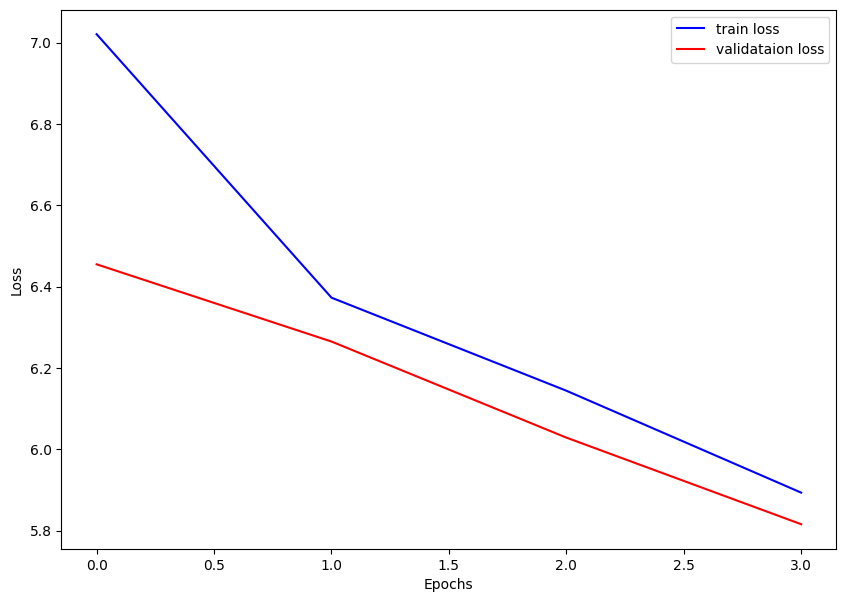

In [ ]:
save_plots(train_loss_list, valid_loss_list)

In [ ]:
!pip install nltk


In [ ]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from tqdm import tqdm

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to compute BLEU score
def compute_bleu(reference_sentences, translated_sentences):
    # Tokenize the sentences
    references = [[ref.split()] for ref in reference_sentences]  # Wrap each reference in a list
    candidates = [sent.split() for sent in translated_sentences]  # Tokenize candidates

    # Compute BLEU score
    score = corpus_bleu(references, candidates)
    return score

# Evaluate function to get translations and references
def evaluate_model(model, dataset):
    model.eval()
    all_references = []
    all_translations = []

    for src, tgt in tqdm(dataset):
        # Convert tensor to sentence
        src_sentence = " ".join(vocab_en.lookup_tokens(src.cpu().numpy().flatten().tolist()))
        reference_sentence = " ".join(vocab_vi.lookup_tokens(tgt.cpu().numpy().flatten().tolist())).replace("<bos>", "").replace("<eos>", "")

        # Translate the source sentence
        translated_sentence = translate(model, src_sentence)

        all_references.append(reference_sentence)  # Append reference
        all_translations.append(translated_sentence)  # Append model output

    return all_references, all_translations

# Test function for evaluating BLEU score
def test_translation_model(model, test_dataset):
    print("Evaluating the translation model...")

    reference_sentences, translated_sentences = evaluate_model(model, test_dataset)

    # Calculate BLEU score
    bleu_score = compute_bleu(reference_sentences, translated_sentences)

    print("BLEU Score:", bleu_score)

# Run the test function with your model and test dataset
test_translation_model(model, test_dataloader)


#Infenrece

In [ ]:
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)
    memory = model.encode(src, src_mask)

    # Tạo tensor đầu vào cho decoder
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)

    for i in range(max_len - 1):
        if i == 0:
            ys = ys.transpose(1, 0)

        tgt_mask = (generate_square_subsequent_mask(ys.size(1))
                    .type(torch.bool)).to(DEVICE)

        # Dự đoán đầu ra từ decoder
        out = model.decode(ys, memory, tgt_mask)

        # Lấy đầu ra từ decoder
        prob = model.generator(out[:, -1])

        # Lấy từ tiếp theo có xác suất cao nhất
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        # Ghép từ tiếp theo vào tensor đầu vào
        ys = torch.cat([ys, torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=1)

        # Nếu gặp dấu kết thúc thì thoát vòng lặp
        if next_word == EOS_IDX:
            break

    return ys


In [ ]:
def text_transform(sentence: str, vocab: dict) -> torch.Tensor:
    # Tokenize the sentence and convert to indices using the vocabulary
    token_ids = vocab(tokenizer(sentence))
    return tensor_transform(token_ids)

def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    # Use the text_transform function with the English vocabulary
    src = text_transform(src_sentence, vocab_en).view(1, -1)
    num_tokens = src.shape[1]

    # Create the source mask
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool).to(DEVICE)

    # Decode the output
    tgt_tokens = greedy_decode(
        model, src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX
    ).flatten()

    # Convert tokens back to text
    return " ".join(vocab_vi.lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

